# Visualiserer data
Bruker seaborn til å lage grafer med verdiene våre. Vi har tidligere funnet gjennomsnittsverdi per måned. For å få en best mulig visualisering av hvordan trendene har endret seg over årene, har vi valgt å bare se på en måned (juli) hvert år. 

   Unnamed: 0  year  month  value
0           0  1975      1  3.332
1           1  1975      2  0.614
2           2  1975      3  1.081
3           3  1975      4  1.062
4           4  1975      5  1.089


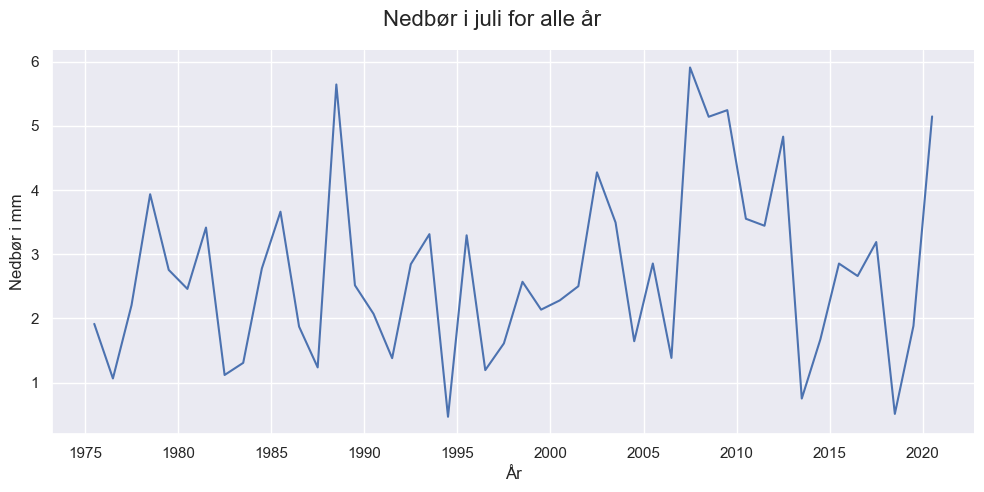

In [21]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

df_nedbor = pd.read_csv("../data/Avarage/avarage_precipitation.csv") # Lager en dataframe av csv-filen med gjennomsnittsnedbør 

print(df_nedbor.head())

df_nedbor["date"] = pd.to_datetime(df[["year", "month"]].assign(day = 1))  # Konverter til datoformat

df_nedbor_juli = df_nedbor[df_nedbor["date"].dt.month == 7] # Velger data for kun juli

sns.set_theme()

nedbor = sns.relplot(   # Lager et plott
    data=df_nedbor_juli, kind="line",
    x="date", y="value",
    height=5, aspect=2
)

nedbor.fig.suptitle("Nedbør i juli for alle år", fontsize=16)
nedbor.set_axis_labels("År", "Nedbør i mm")
nedbor.fig.tight_layout()
nedbor.fig.subplots_adjust(top=0.9)

   Unnamed: 0  year  month   value
0           0  1975      1   0.110
1           1  1975      2  -3.664
2           2  1975      3   0.403
3           3  1975      4   4.172
4           4  1975      5  11.313


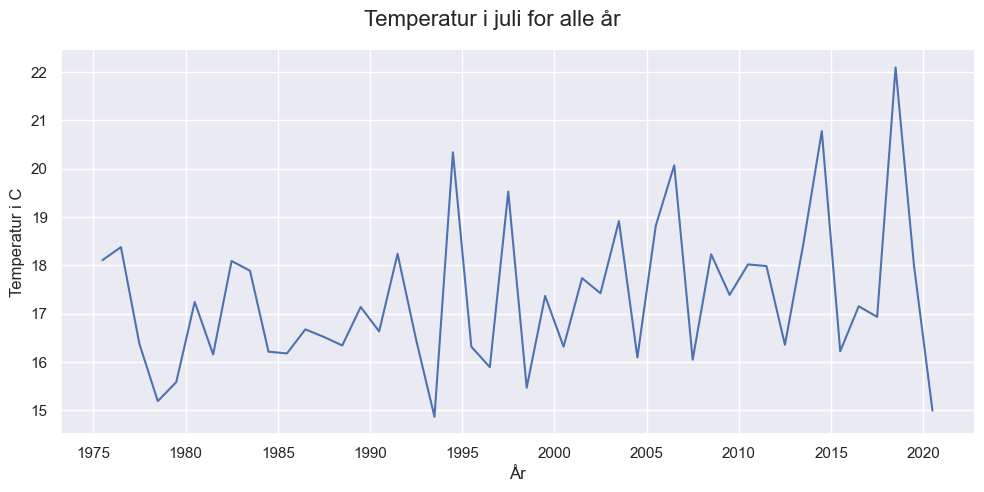

In [22]:
df_temp = pd.read_csv("../data/Avarage/avarage_temperatur.csv") 

print(df_temp.head())

df_temp["date"] = pd.to_datetime(df[["year", "month"]].assign(day = 1))  # Konverter til datoformat

df_temp_juli = df_temp[df_temp["date"].dt.month == 7]

sns.set_theme()


temp = sns.relplot(
    data=df_temp_juli, kind="line",
    x="date", y="value",
    height=5, aspect=2
)

temp.fig.suptitle("Temperatur i juli for alle år", fontsize=16)
temp.set_axis_labels("År", "Temperatur i C")
temp.fig.tight_layout()
temp.fig.subplots_adjust(top=0.9)

   Unnamed: 0  year  month   value
0           0  1975      1   0.110
1           1  1975      2  -3.664
2           2  1975      3   0.403
3           3  1975      4   4.172
4           4  1975      5  11.313


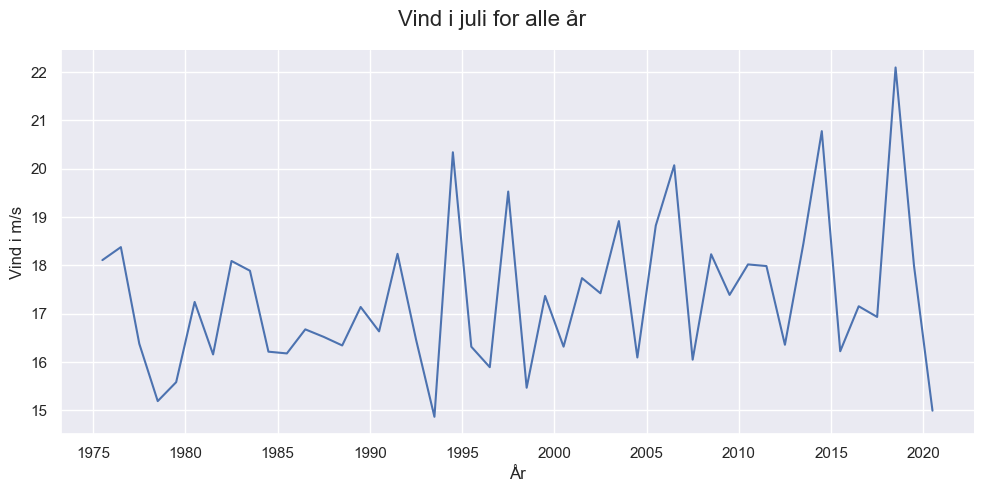

In [23]:
df_vind = pd.read_csv("../data/Avarage/avarage_temperatur.csv") 

print(df_vind.head())

df_vind["date"] = pd.to_datetime(df[["year", "month"]].assign(day = 1))  # Konverter til datoformat

df_vind_juli = df_vind[df_vind["date"].dt.month == 7]

sns.set_theme()


vind = sns.relplot(
    data=df_vind_juli, kind="line",
    x="date", y="value",
    height=5, aspect=2
)

vind.fig.suptitle("Vind i juli for alle år", fontsize=16)
vind.set_axis_labels("År", "Vind i m/s")
vind.fig.tight_layout()
vind.fig.subplots_adjust(top=0.9)

In [51]:

import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import requests
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets

df_nedbor["date"] = pd.to_datetime(df_nedbor[["year", "month"]].assign(day = 1))  # Konverter til datoformat

# Widget for dato-intervall
dato_slider = widgets.SelectionRangeSlider(
    options=df_nedbor['date'].dt.date.unique().tolist(),
    index=(0, 30),
    description='Dato:',
    layout={'width': '80%'}
)

def oppdater_graf(dato_range):
    start, slutt = pd.to_datetime(dato_range[0]), pd.to_datetime(dato_range[1])
    nedboer = df_nedbor[
        (df_nedbor['date'] >= start) &
        (df_nedbor['date'] <= slutt)
    ]
    
    fig = px.line(nedboer, x='date', y='value', title="Nedbør over tid")
    fig.update_layout(yaxis_title="Nedbør (mm)")
    fig.show()

# Koble dato-slider til funksjonen
widgets.interact(oppdater_graf, dato_range=dato_slider)

interactive(children=(SelectionRangeSlider(description='Dato:', index=(0, 30), layout=Layout(width='80%'), opt…

<function __main__.oppdater_graf(dato_range)>

# Scatterplot i Matplotlib

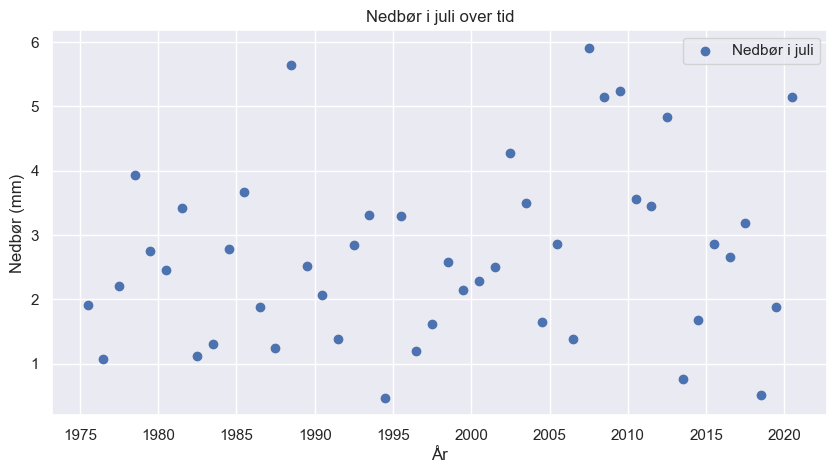

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Lese inn CSV-filen
df_nedbor_plt = pd.read_csv("../data/Avarage/avarage_precipitation.csv")

# 2. Konvertere dato-kolonnen til datetime-format (hvis aktuelt)
df_nedbor_plt["date"] = pd.to_datetime(df_nedbor_plt[["year", "month"]].assign(day = 1))

df_nedbor_plt_juli = df_nedbor_plt[df_nedbor_plt["month"] == 7]

# 4. Plot data
plt.figure(figsize=(10, 5))
plt.scatter(df_nedbor_plt_juli["date"], df_nedbor_plt_juli["value"], marker="o", color="b", label="Nedbør i juli")

# 5. Tilpasse plottet
plt.xlabel("År")
plt.ylabel("Nedbør (mm)")
plt.title("Nedbør i juli over tid")
plt.legend()
plt.grid(True)

# 6. Vise plottet
plt.show()

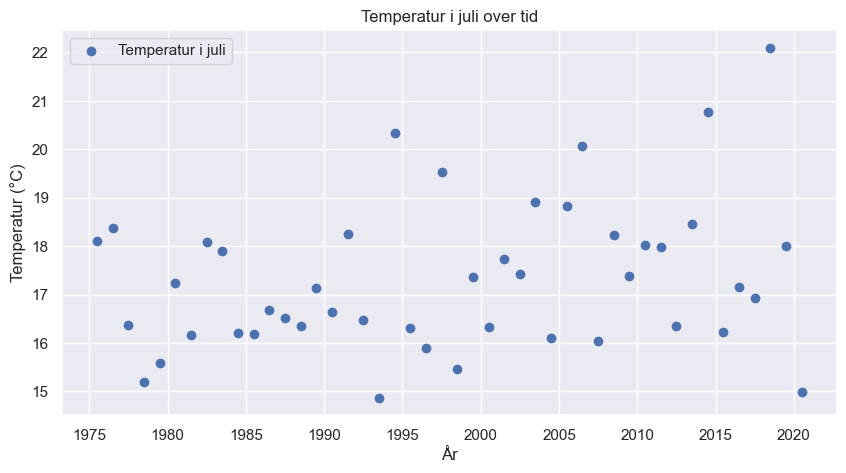

In [34]:
# 1. Lese inn CSV-filen
df_temp_plt = pd.read_csv("../data/Avarage/avarage_temperatur.csv")

# 2. Konvertere dato-kolonnen til datetime-format (hvis aktuelt)
df_temp_plt["date"] = pd.to_datetime(df_temp_plt[["year", "month"]].assign(day = 1))

df_temp_plt_juli = df_temp_plt[df_temp_plt["month"] == 7]

# 4. Plot data
plt.figure(figsize=(10, 5))
plt.scatter(df_temp_plt_juli["date"], df_temp_plt_juli["value"], marker="o", color="b", label="Temperatur i juli")

# 5. Tilpasse plottet
plt.xlabel("År")
plt.ylabel("Temperatur (°C)")
plt.title("Temperatur i juli over tid")
plt.legend()
plt.grid(True)

# 6. Vise plottet
plt.show()

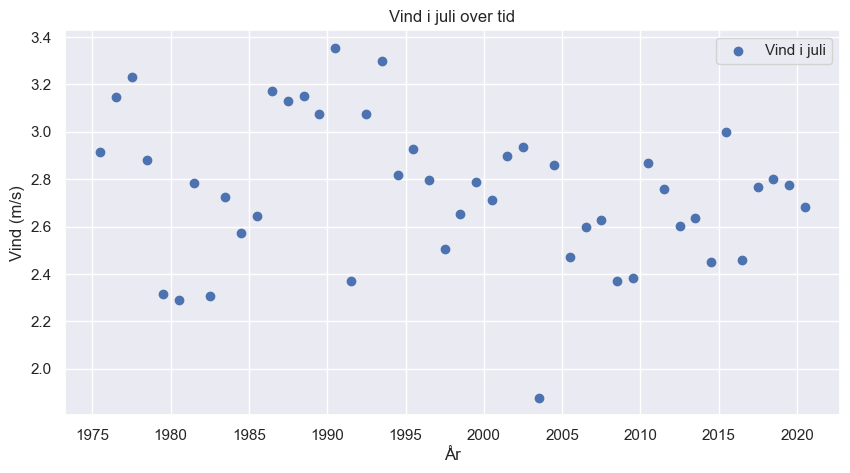

In [35]:
# 1. Lese inn CSV-filen
df_vind_plt = pd.read_csv("../data/Avarage/avarage_wind.csv")

# 2. Konvertere dato-kolonnen til datetime-format (hvis aktuelt)
df_vind_plt["date"] = pd.to_datetime(df_vind_plt[["year", "month"]].assign(day = 1))

df_vind_plt_juli = df_vind_plt[df_vind_plt["month"] == 7]

# 4. Plot data
plt.figure(figsize=(10, 5))
plt.scatter(df_vind_plt_juli["date"], df_vind_plt_juli["value"], marker="o", color="b", label="Vind i juli")

# 5. Tilpasse plottet
plt.xlabel("År")
plt.ylabel("Vind (m/s)")
plt.title("Vind i juli over tid")
plt.legend()
plt.grid(True)

# 6. Vise plottet
plt.show()